# Introduction

   The goals of this project are to determine the causes for churn among customers and to determine which method is the best to use with the Churn dataset. The first thing to do is to use Exploratory Data Analysis with converting words to numbers and with plotting a few histograms and box plots regarding tenure and senior citizens. Next is to obtain the statistics of these histograms and box plots then to use feature engineering on the data regarding variables, features, dimensionality, and PCA. Once the feature engineering is carried out, the univariate analysis graphs and bivariate analysis graphs are to be plotted, and the findings of the graphs are to be used to determine the causes of customer churn. After this, a proposal is to be given on how to address the causes of customer churn then the KNN Classifier, Random Forest, Logistic Regression, Decision Tree, and Gradient Boosting methods are to be used to obtain cross_val_scores, accuracy scores, precision scores, recall scores, and F1 scores to determine which method is best for the Churn dataset. These are the steps to take to achieve my goals for customer churn and best method.

# Exploratory Data Analysis

In [199]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy
import matplotlib.pyplot as plt
from sklearn import tree
from IPython.display import Image
import pydotplus
import graphviz
%matplotlib inline
from scipy.stats import jarque_bera
from scipy.stats import normaltest
from scipy.stats import boxcox
from sklearn.preprocessing import normalize
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import confusion_matrix
import math
from sklearn.decomposition import PCA

In [200]:
df = pd.read_excel(r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx')

In [201]:
# Conversion of words in the data to numbers

df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 2})

df['InternetService'] = df['InternetService'].map({'DSL': 1, 'No': 0, 'Fiber optic': 2})

df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 2})

df['Contract'] = df['Contract'].map({'One year': 1, 'Month-to-month': 0, 'Two year': 2})

df['PaymentMethod'] = df['PaymentMethod'].map({'Mailed check': 1, 'Electronic check': 0, 'Bank transfer (automatic)': 2, 'Credit card (automatic)': 3})

In [202]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null int64
SeniorCitizen       7043 non-null int64
Partner             7043 non-null int64
Dependents          7043 non-null int64
tenure              7043 non-null int64
PhoneService        7043 non-null int64
MultipleLines       7043 non-null int64
InternetService     7043 non-null int64
OnlineSecurity      7043 non-null int64
OnlineBackup        7043 non-null int64
DeviceProtection    7043 non-null int64
TechSupport         7043 non-null int64
StreamingTV         7043 non-null int64
StreamingMovies     7043 non-null int64
Contract            7043 non-null int64
PaperlessBilling    7043 non-null int64
PaymentMethod       7043 non-null int64
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null int64
dtypes: float64(1), int64(18), object(2)
memory u

In [203]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,0,0,0,0,0,1,0,29.85,29.85,0
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,1,0,0,0,1,0,1,56.95,1889.5,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,0,0,0,0,0,1,1,53.85,108.15,1
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,1,1,0,0,1,0,2,42.30,1840.75,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,0,0,0,0,0,1,0,70.70,151.65,1


In [204]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [205]:
df.isnull()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [206]:
df.isnull().sum()*100/df.isnull().count()

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

There are no missing data.

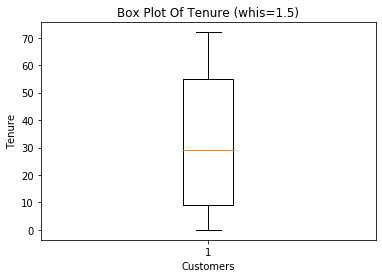

In [207]:
# Box plot for tenure category (whis=1.5)

plt.boxplot(df["tenure"])
plt.title("Box Plot Of Tenure (whis=1.5)")
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.show()

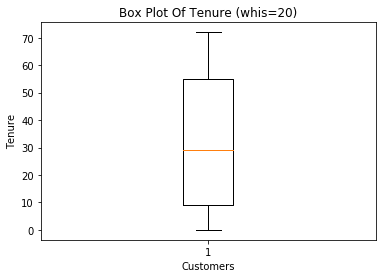

In [208]:
# Box plot for tenure category (whis=20)

plt.boxplot(df["tenure"], whis=20)
plt.title("Box Plot Of Tenure (whis=20)")
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.show()

In [209]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

The median of the two tenure box plots above is 29 dollars, the 25th percentile is 9 dollars, the 75th percentile is 55 dollars, the maximum is 72 dollars, and the minimum is 0 dollars.

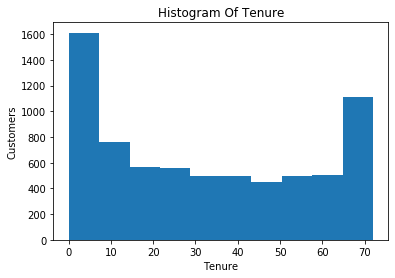

In [210]:
# Histogram for tenure category

plt.hist(df["tenure"])
plt.title("Histogram Of Tenure")
plt.xlabel("Tenure")
plt.ylabel("Customers")
plt.show()

Approximately half of the customers have tenures between about 15 and 65 dollars, a little over a third of the customers have tenures between 0 and 14 dollars, approximately 15% of the customers have tenures that are between 66 and 72 dollars.

In [211]:
# The score thresholds, the indices of the outliers, and the numbers of outliers of the tenure category

from scipy.stats import zscore

z_scores = zscore(df["tenure"])
for threshold in range(1,5):
    print("The score threshold is: {}".format(threshold))
    print("The indices of the outliers:")
    print(np.where(z_scores > threshold))
    print("Number of outliers is: {}".format(len((np.where(z_scores > threshold)[0]))))

The score threshold is: 1
The indices of the outliers:
(array([   9,   12,   15, ..., 7037, 7039, 7042], dtype=int64),)
Number of outliers is: 1675
The score threshold is: 2
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 3
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0
The score threshold is: 4
The indices of the outliers:
(array([], dtype=int64),)
Number of outliers is: 0


In [212]:
# The score thresholds and the numbers of outliers of the tenure category

q75, q25 = np.percentile(df["tenure"], [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((df["tenure"] > max_val) 
                      | (df["tenure"] < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 0
The score threshold is: 1.5
Number of outliers is: 0
The score threshold is: 2.0
Number of outliers is: 0
The score threshold is: 2.5
Number of outliers is: 0
The score threshold is: 3.0
Number of outliers is: 0
The score threshold is: 3.5
Number of outliers is: 0
The score threshold is: 4.0
Number of outliers is: 0
The score threshold is: 4.5
Number of outliers is: 0


In [213]:
# Winsorization of the tenure category

from scipy.stats.mstats import winsorize

winsorized_views = winsorize(df["tenure"], (0, 0.10))

winsorized_views

masked_array(data=[ 1, 34,  2, ..., 11,  4, 66],
             mask=False,
       fill_value=999999,
            dtype=int64)

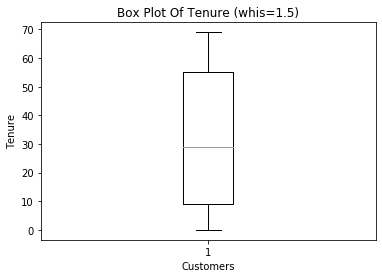

In [214]:
# Box plot for the tenure category

plt.boxplot(winsorized_views)
plt.title("Box Plot Of Tenure (whis=1.5)")
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.show()

In [215]:
df['tenure'].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

The median of the tenure box plot is 29 dollars, the 25th percentile is 9 dollars, the 75th percentile is 55 dollars, the maximum is 72 dollars, and the minimum is 0 dollars.

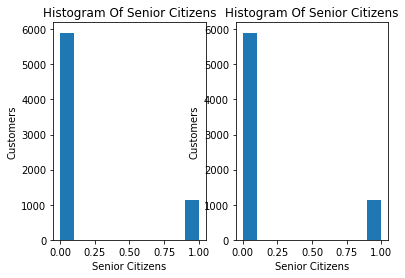

In [216]:
# Two histograms regarding senior citizens

plt.subplot(1,2,1)
plt.hist(df["SeniorCitizen"])
plt.title("Histogram Of Senior Citizens")
plt.xlabel("Senior Citizens")
plt.ylabel("Customers")

plt.subplot(1,2,2)
plt.hist(df["SeniorCitizen"])
plt.title("Histogram Of Senior Citizens")
plt.xlabel("Senior Citizens")
plt.ylabel("Customers")
plt.show()

The histograms here reveal that approximately 85% of the customers are younger adults while approximately 15% of the customers are senior citizens.

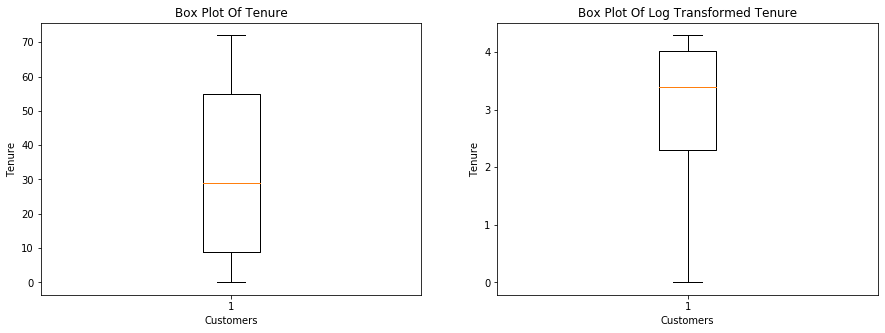

In [217]:
# Box plots of tenure and log transformed tenure

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
plt.boxplot(df["tenure"])
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.title("Box Plot Of Tenure")

plt.subplot(1,2,2)
plt.boxplot(np.log(df["tenure"]+1))
plt.xlabel("Customers")
plt.ylabel("Tenure")
plt.title("Box Plot Of Log Transformed Tenure")
plt.show()

In [218]:
df["tenure"].describe()

count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [219]:
np.log(df["tenure"]+1).describe()

count    7043.000000
mean        3.036873
std         1.155510
min         0.000000
25%         2.302585
50%         3.401197
75%         4.025352
max         4.290459
Name: tenure, dtype: float64

The median of the tenure box plot is 29 dollars, the maximum is 72 dollars, the minimum is 0 dollars, the 25th percentile is 
2.197225 dollars, and the 75th percentile is 4.007333 dollars. The median of the log transformed tenure box plot is 3.367296 
dollars, the maximum is 4.276666 dollars, the minimum is negative infinity, the 25th percentile is 2.197225, and the 75th 
percentile is 4.007333.

In [220]:
# The score thresholds and the numbers of outliers of the log transformed tenure category

q75, q25 = np.percentile(np.log(df["tenure"]), [75 ,25])
iqr = q75 - q25

for threshold in np.arange(1,5,0.5):
    min_val = q25 - (iqr*threshold)
    max_val = q75 + (iqr*threshold)
    print("The score threshold is: {}".format(threshold))
    print("Number of outliers is: {}".format(
        len((np.where((np.log(df["tenure"]) > max_val) 
                      | (np.log(df["tenure"]) < min_val))[0]))))

The score threshold is: 1.0
Number of outliers is: 624
The score threshold is: 1.5
Number of outliers is: 11
The score threshold is: 2.0
Number of outliers is: 11
The score threshold is: 2.5
Number of outliers is: 11
The score threshold is: 3.0
Number of outliers is: 11
The score threshold is: 3.5
Number of outliers is: 11
The score threshold is: 4.0
Number of outliers is: 11
The score threshold is: 4.5
Number of outliers is: 11


C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
C:\ANACONDA\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log
  if sys.path[0] == '':


# Feature Engineering 1: From Variables To Features

In [221]:
# Winsorization of tenure, monthly charges, and multiple lines

df["winsorized_tenure"] = winsorized_views = winsorize(df["tenure"], (0, 0.10))
df["winsorized_monthly_charges"] = winsorized_views = winsorize(df["MonthlyCharges"], (0, 0.10))
df["winsorized_multiple_lines"] = winsorized_views = winsorize(df["MultipleLines"], (0, 0.10))

for i in range(0, len(df.Partner)):
    if pd.isnull(df.Partner[i]):
        df.Partner[i] = df.Partner[i-1]
        
pd.get_dummies(df["Partner"])

,0,1
0,0,1
1,1,0
2,1,0
3,1,0
4,1,0
5,1,0
6,1,0
7,1,0
8,0,1
9,1,0


In [222]:
# Append dummies to Churn dataset

df = pd.concat([df, pd.get_dummies(df["Partner"])], axis=1)
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,winsorized_tenure,winsorized_monthly_charges,winsorized_multiple_lines,0,1
0,7590-VHVEG,0,0,1,0,1,0,2,1,0,...,1,0,29.85,29.85,0,1,29.85,1,0,1
1,5575-GNVDE,1,0,0,0,34,1,0,1,1,...,0,1,56.95,1889.5,0,34,56.95,0,1,0
2,3668-QPYBK,1,0,0,0,2,1,0,1,1,...,1,1,53.85,108.15,1,2,53.85,0,1,0
3,7795-CFOCW,1,0,0,0,45,0,2,1,1,...,0,2,42.30,1840.75,0,45,42.30,1,1,0
4,9237-HQITU,0,0,0,0,2,1,0,2,0,...,1,0,70.70,151.65,1,2,70.70,0,1,0
5,9305-CDSKC,0,0,0,0,8,1,1,2,0,...,1,0,99.65,820.5,1,8,99.65,1,1,0
6,1452-KIOVK,1,0,0,1,22,1,1,2,0,...,1,3,89.10,1949.4,0,22,89.10,1,1,0
7,6713-OKOMC,0,0,0,0,10,0,2,1,1,...,0,1,29.75,301.9,0,10,29.75,1,1,0
8,7892-POOKP,0,0,1,0,28,1,1,2,0,...,1,0,104.80,3046.05,1,28,102.60,1,0,1
9,6388-TABGU,1,0,0,1,62,1,0,1,1,...,0,2,56.15,3487.95,0,62,56.15,0,1,0


In [223]:
df = df.drop(columns=['customerID','TotalCharges'])

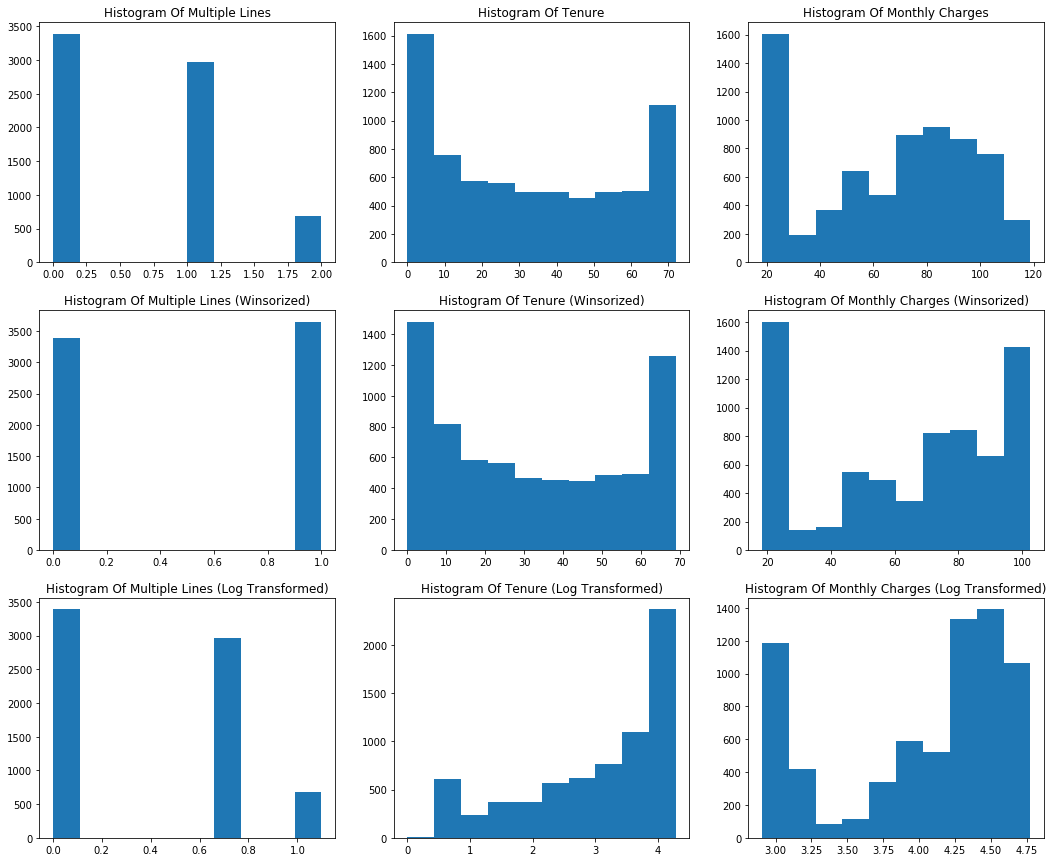

In [224]:
plt.figure(figsize=(18,15))

# Histograms of the original Churn data

plt.subplot(3, 3, 1)
plt.hist(df["MultipleLines"])
plt.title("Histogram Of Multiple Lines")

plt.subplot(3, 3, 2)
plt.hist(df["tenure"])
plt.title("Histogram Of Tenure")

plt.subplot(3, 3, 3)
plt.hist(df["MonthlyCharges"])
plt.title("Histogram Of Monthly Charges")

# Histograms of the winsorized Churn data

plt.subplot(3, 3, 4)
plt.hist(df["winsorized_multiple_lines"])
plt.title("Histogram Of Multiple Lines (Winsorized)")

plt.subplot(3, 3, 5)
plt.hist(df["winsorized_tenure"])
plt.title("Histogram Of Tenure (Winsorized)")

plt.subplot(3, 3, 6)
plt.hist(df["winsorized_monthly_charges"])
plt.title("Histogram Of Monthly Charges (Winsorized)")

# Histograms of the log transformed Churn data

plt.subplot(3, 3, 7)
plt.hist(np.log(df["MultipleLines"]+1))
plt.title("Histogram Of Multiple Lines (Log Transformed)")

plt.subplot(3, 3, 8)
plt.hist(np.log(df["tenure"]+1))
plt.title("Histogram Of Tenure (Log Transformed)")

plt.subplot(3, 3, 9)
plt.hist(np.log(df["MonthlyCharges"]))
plt.title("Histogram Of Monthly Charges (Log Transformed)")


plt.show()

In [225]:
# Jarque-Bera and Normal tests for multiple lines, tenure, and monthly charges

jb_stats = jarque_bera(np.log(df["MultipleLines"]+1))
norm_stats = normaltest(np.log(df["MultipleLines"]+1))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(df["tenure"]+1))
norm_stats = normaltest(np.log(df["tenure"]+1))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(np.log(df["MonthlyCharges"]))
norm_stats = normaltest(np.log(df["MonthlyCharges"]))

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 714.3103756519669 and p value is 0.0
Normality test statistics is 42987.896532524006 and p value is 0.0
Jarque-Bera test statistics is 828.8202199640531 and p value is 0.0
Normality test statistics is 832.7131792401156 and p value is 1.508796347150493e-181
Jarque-Bera test statistics is 891.3340210594985 and p value is 0.0
Normality test statistics is 1774.4968863588751 and p value is 0.0


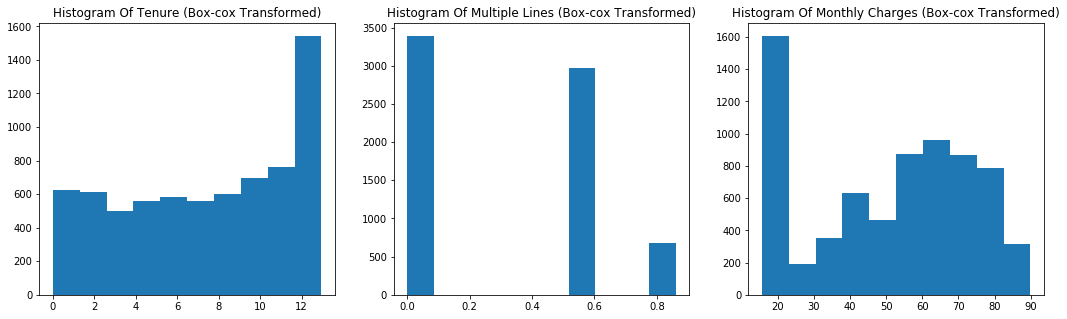

In [226]:
tenure_boxcox,_ = boxcox(df["tenure"]+1)
multiple_lines_boxcox,_ = boxcox(df["MultipleLines"]+1)
monthly_charges_boxcox,_ = boxcox(df["MonthlyCharges"]+1)

plt.figure(figsize=(18,5))

# Histograms of the box-cox transformed data

plt.subplot(1, 3, 1)
plt.hist(tenure_boxcox)
plt.title("Histogram Of Tenure (Box-cox Transformed)")

plt.subplot(1, 3, 2)
plt.hist(multiple_lines_boxcox)
plt.title("Histogram Of Multiple Lines (Box-cox Transformed)")

plt.subplot(1, 3, 3)
plt.hist(monthly_charges_boxcox)
plt.title("Histogram Of Monthly Charges (Box-cox Transformed)")

plt.show()

In [227]:
# Jarque-Bera and Normal tests for tenure_boxcox, multiple_lines_boxcox, and monthly_charges_boxcox

jb_stats = jarque_bera(tenure_boxcox)
norm_stats = normaltest(tenure_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(multiple_lines_boxcox)
norm_stats = normaltest(multiple_lines_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

jb_stats = jarque_bera(monthly_charges_boxcox)
norm_stats = normaltest(monthly_charges_boxcox)

print("Jarque-Bera test statistics is {0} and p value is {1}".format(jb_stats[0], jb_stats[1]))
print("Normality test statistics is {0} and p value is {1}".format(norm_stats[0], norm_stats[1]))

Jarque-Bera test statistics is 560.359718445871 and p value is 0.0
Normality test statistics is 21071.71219597256 and p value is 0.0
Jarque-Bera test statistics is 864.1779856735387 and p value is 0.0
Normality test statistics is 30660.52514656574 and p value is 0.0
Jarque-Bera test statistics is 537.6519112411993 and p value is 0.0
Normality test statistics is 10483.311489379157 and p value is 0.0


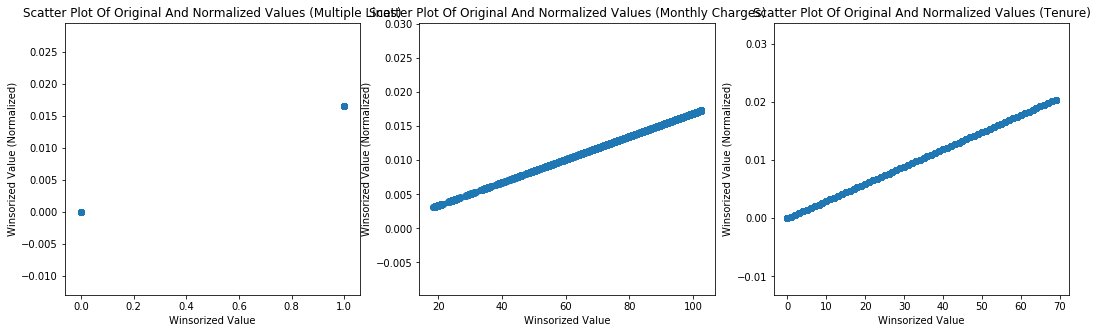

In [228]:
# Normalize the winsorized variables

df["norm_winsorized_multiple_lines"] = normalize(np.array(df["winsorized_multiple_lines"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorized_monthly_charges"] = normalize(np.array(df["winsorized_monthly_charges"]).reshape(1,-1)).reshape(-1,1)
df["norm_winsorized_tenure"] = normalize(np.array(df["winsorized_tenure"]).reshape(1,-1)).reshape(-1,1)

plt.figure(figsize=(18,5))

# Draw the scatter plots

plt.subplot(1,3,1)

plt.scatter(df["winsorized_multiple_lines"], df["norm_winsorized_multiple_lines"])
plt.title("Scatter Plot Of Original And Normalized Values (Multiple Lines)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,2)

plt.scatter(df["winsorized_monthly_charges"], df["norm_winsorized_monthly_charges"])
plt.title("Scatter Plot Of Original And Normalized Values (Monthly Charges)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.subplot(1,3,3)

plt.scatter(df["winsorized_tenure"], df["norm_winsorized_tenure"])
plt.title("Scatter Plot Of Original And Normalized Values (Tenure)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Normalized)")

plt.show()

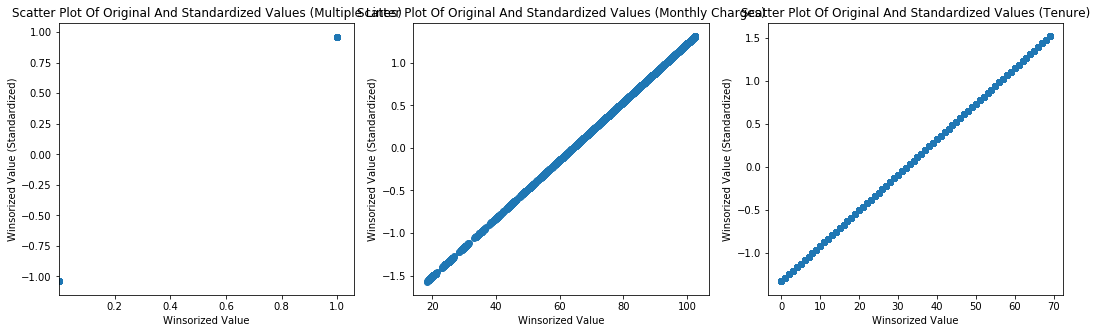

In [229]:
df["scaled_winsorized_multiple_lines"] = scale(df["winsorized_multiple_lines"])
df["scaled_winsorized_monthly_charges"] = scale(df["winsorized_monthly_charges"])
df["scaled_winsorized_tenure"] = scale(df["winsorized_tenure"])

plt.figure(figsize=(18,5))

# Draw the scatter plots

plt.subplot(1,3,1)

plt.scatter(df["winsorized_multiple_lines"], df["scaled_winsorized_multiple_lines"])
plt.title("Scatter Plot Of Original And Standardized Values (Multiple Lines)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")
plt.xlim(0.00000001)

plt.subplot(1,3,2)

plt.scatter(df["winsorized_monthly_charges"], df["scaled_winsorized_monthly_charges"])
plt.title("Scatter Plot Of Original And Standardized Values (Monthly Charges)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.subplot(1,3,3)

plt.scatter(df["winsorized_tenure"], df["scaled_winsorized_tenure"])
plt.title("Scatter Plot Of Original And Standardized Values (Tenure)")
plt.xlabel("Winsorized Value")
plt.ylabel("Winsorized Value (Standardized)")

plt.show()

# Feature Engineering 2: Dimensionality And PCA

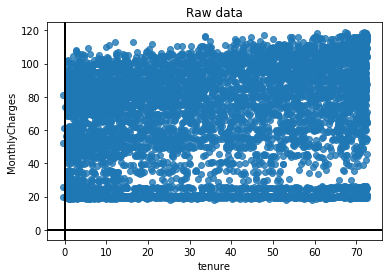

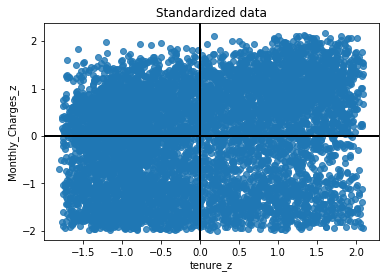

In [230]:
t = sns.regplot('tenure','MonthlyCharges',df,x_jitter=.49,y_jitter=.49,fit_reg=False)

# t.set(xlim=(-1, 11), ylim=(-1, 11))

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Raw Data')
plt.show()

# Standardizing variables 

st_df = pd.DataFrame()
st_df['tenure_z'] = (df['tenure'] - df['tenure'].mean()) / df['tenure'].std()
st_df['Monthly_Charges_z'] = (df['MonthlyCharges'] - df['MonthlyCharges'].mean()) / df['MonthlyCharges'].std()

t = sns.regplot('tenure_z','Monthly_Charges_z',st_df,x_jitter=.49,y_jitter=.49,fit_reg=False)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized Data')
plt.show()

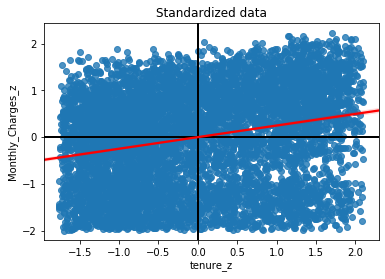

In [231]:
t = sns.regplot('tenure_z','Monthly_Charges_z',st_df,x_jitter=.49,y_jitter=.49,fit_reg=False)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Standardized data')

sns.regplot('tenure_z', 'Monthly_Charges_z', st_df, scatter=False, color="red")

plt.show()

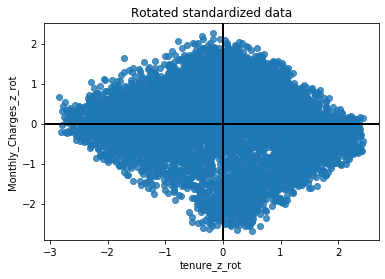

In [232]:
# Rotating the data

st_df['tenure_z_rot'] = math.cos(40) * st_df['tenure_z'] - math.sin(40) * st_df['Monthly_Charges_z']
st_df['Monthly_Charges_z_rot'] = math.sin(40) * st_df['Monthly_Charges_z'] + math.cos(40) * st_df['tenure_z']

t = sns.regplot('tenure_z_rot','Monthly_Charges_z_rot',st_df,x_jitter=.49,y_jitter=.49,fit_reg=False)

t.axhline(0, color='k', linestyle='-', linewidth=2)
t.axvline(0, color='k', linestyle='-', linewidth=2)
t.axes.set_title('Rotated Standardized Data')
plt.show()

In [233]:
df = df.dropna()

# Normalize the data 

X = StandardScaler().fit_transform(df)

# The NumPy covariance function and transposing X

Xt = X.T
Cx = np.cov(Xt)
print('Covariance Matrix:\n', Cx)

Covariance Matrix:
 [[ 1.00014201e+00 -1.87397771e-03 -1.80833642e-03  1.05181053e-02
   5.10694773e-03 -6.48859342e-03 -4.84667277e-04 -1.03816916e-02
  -3.42903928e-03 -2.03247145e-03  5.09238084e-03  9.85322036e-04
   1.15645296e-03 -1.90762466e-04  1.25765508e-04 -1.17553603e-02
  -5.21002990e-03 -1.45713926e-02 -8.61331804e-03  5.13044531e-03
  -1.38043331e-02 -4.47675801e-03  1.80833642e-03 -1.80833642e-03
  -4.47675801e-03 -1.38043331e-02  5.13044531e-03 -4.47675801e-03
  -1.38043331e-02  5.13044531e-03]
 [-1.87397771e-03  1.00014201e+00  1.64809977e-02 -2.11215078e-01
   1.65692303e-02  8.57761897e-03  9.98975517e-02  2.59426935e-01
  -2.10927363e-01 -1.52801647e-01 -1.57117732e-01 -2.23802100e-01
  -1.30148775e-01 -1.20819436e-01 -1.42574324e-01  1.56551787e-01
  -9.37172624e-02  2.20204604e-01  1.50910755e-01  1.68593910e-02
   2.22721487e-01  1.36232440e-01 -1.64809977e-02  1.64809977e-02
   1.36232440e-01  2.22721487e-01  1.68593910e-02  1.36232440e-01
   2.22721487e-01  1.

In [234]:
# Calculating eigenvalues and eigenvectors

eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

# Inspecting the eigenvalues and eigenvectors

for i in range(len(eig_val_cov)):
    eigvec_cov = eig_vec_cov[:, i].T
    print('Eigenvector {}: \n{}'.format(i + 1, eigvec_cov))
    print('Eigenvalue {}: {}'.format(i + 1, eig_val_cov[i]))
    print(40 * '-')

print('The percentage of total variance in the dataset explained by each','component calculated by hand.\n',
    eig_val_cov / sum(eig_val_cov))

Eigenvector 1: 
[ 0.00312306+0.j -0.09534256+0.j -0.00103238+0.j  0.06633269+0.j
 -0.0213311 +0.j  0.01864365+0.j -0.13221755+0.j -0.31153377+0.j
  0.28119976+0.j  0.26022516+0.j  0.25976732+0.j  0.28036898+0.j
  0.23907403+0.j  0.23900799+0.j  0.09705563+0.j -0.13965847+0.j
  0.05900935+0.j -0.28881939+0.j -0.10855289+0.j -0.02141744+0.j
 -0.29197483+0.j -0.16255378+0.j  0.00103238+0.j -0.00103238+0.j
 -0.16255378+0.j -0.29197483+0.j -0.02141744+0.j -0.16255378+0.j
 -0.29197483+0.j -0.02141744+0.j]
Eigenvalue 1: (8.916193703997322+0j)
----------------------------------------
Eigenvector 2: 
[-0.00036896+0.j  0.00345386+0.j -0.23622831+0.j -0.12427025+0.j
 -0.3518245 +0.j  0.01834875+0.j -0.14926298+0.j  0.01895727+0.j
 -0.0914201 +0.j -0.10289914+0.j -0.10862035+0.j -0.09344854+0.j
 -0.09546147+0.j -0.09659773+0.j -0.27483336+0.j  0.01320143+0.j
 -0.14712686+0.j -0.0736456 +0.j  0.1520311 +0.j -0.35135968+0.j
 -0.06685914+0.j -0.18510729+0.j  0.23622831+0.j -0.23622831+0.j
 -0.1851072

C:\ANACONDA\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


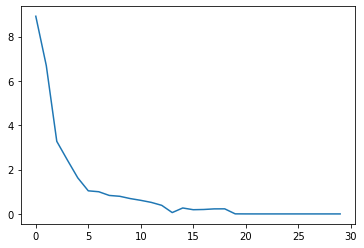

[ 8.91619370e+00+0.00000000e+00j  6.69037992e+00+0.00000000e+00j
  3.27358301e+00+0.00000000e+00j  2.43809781e+00+0.00000000e+00j
  1.62664662e+00+0.00000000e+00j  1.04182305e+00+0.00000000e+00j
  1.00041437e+00+0.00000000e+00j  8.33431588e-01+0.00000000e+00j
  7.94960066e-01+0.00000000e+00j  6.91755795e-01+0.00000000e+00j
  6.12758195e-01+0.00000000e+00j  5.20248221e-01+0.00000000e+00j
  3.86919145e-01+0.00000000e+00j  6.06850130e-02+0.00000000e+00j
  2.67777074e-01+0.00000000e+00j  1.89687358e-01+0.00000000e+00j
  1.99721074e-01+0.00000000e+00j  2.26982169e-01+0.00000000e+00j
  2.29053269e-01+0.00000000e+00j  2.66506786e-03+0.00000000e+00j
  4.77646155e-04+0.00000000e+00j  2.65403939e-16+0.00000000e+00j
 -1.41738403e-15+0.00000000e+00j -2.16128991e-17+1.91150083e-16j
 -2.16128991e-17-1.91150083e-16j  5.39111200e-17+0.00000000e+00j
 -1.55337311e-16+0.00000000e+00j -1.24531261e-16+0.00000000e+00j
 -1.19945049e-16+0.00000000e+00j -4.68482541e-33+0.00000000e+00j]


In [235]:
# Print scree plot

plt.plot(eig_val_cov)
plt.show()

print(eig_val_cov)

C:\ANACONDA\lib\site-packages\numpy\core\numeric.py:538: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


The percentage of total variance in the dataset explained by each component from Sklearn PCA.
 [0.29716426 0.222981   0.10910394 0.08125839 0.05421385]


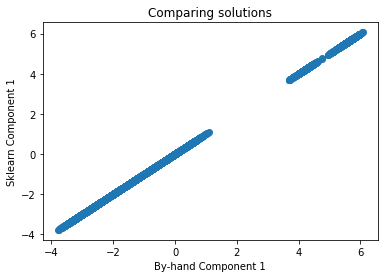

In [236]:
sklearn_pca = PCA(n_components=5)
Y_sklearn = sklearn_pca.fit_transform(X)

P = eig_vec_cov[:, 0]

# Transform X into Y

Y = P.T.dot(Xt)

print('The percentage of total variance in the dataset explained by each','component from Sklearn PCA.\n',
      sklearn_pca.explained_variance_ratio_)

# Comparing the sklearn solution to mine

plt.plot(Y_sklearn[:, 0], Y, 'o')
plt.title('Comparing solutions')
plt.ylabel('Sklearn Component 1')
plt.xlabel('By-hand Component 1')
plt.show()

In [237]:
df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,winsorized_monthly_charges,winsorized_multiple_lines,0,1,norm_winsorized_multiple_lines,norm_winsorized_monthly_charges,norm_winsorized_tenure,scaled_winsorized_multiple_lines,scaled_winsorized_monthly_charges,scaled_winsorized_tenure
0,0,0,1,0,1,0,2,1,0,1,...,29.85,1,0,1,0.016545,0.005041,0.000296,0.963330,-1.173013,-1.286442
1,1,0,0,0,34,1,0,1,1,0,...,56.95,0,1,0,0.000000,0.009618,0.010065,-1.038066,-0.247446,0.076324
2,1,0,0,0,2,1,0,1,1,1,...,53.85,0,1,0,0.000000,0.009094,0.000592,-1.038066,-0.353322,-1.245146
3,1,0,0,0,45,0,2,1,1,0,...,42.30,1,1,0,0.016545,0.007144,0.013322,0.963330,-0.747799,0.530579
4,0,0,0,0,2,1,0,2,0,0,...,70.70,0,1,0,0.000000,0.011940,0.000592,-1.038066,0.222169,-1.245146
5,0,0,0,0,8,1,1,2,0,0,...,99.65,1,1,0,0.016545,0.016829,0.002368,0.963330,1.210922,-0.997371
6,1,0,0,1,22,1,1,2,0,1,...,89.10,1,1,0,0.016545,0.015047,0.006513,0.963330,0.850599,-0.419227
7,0,0,0,0,10,0,2,1,1,0,...,29.75,1,1,0,0.016545,0.005024,0.002960,0.963330,-1.176429,-0.914779
8,0,0,1,0,28,1,1,2,0,0,...,102.60,1,0,1,0.016545,0.017327,0.008289,0.963330,1.311675,-0.171452
9,1,0,0,1,62,1,0,1,1,1,...,56.15,0,1,0,0.000000,0.009483,0.018354,-1.038066,-0.274769,1.232611


# Univariate Analyses

Text(0.5, 1.0, 'Histogram Of Genders')

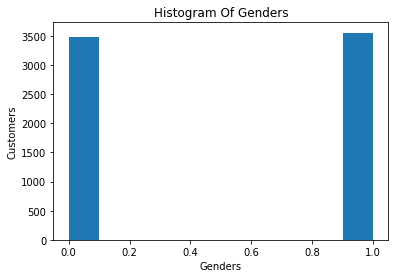

In [238]:
# Histogram of genders

plt.hist(df['gender'])
plt.xlabel("Genders")
plt.ylabel("Customers")
plt.title("Histogram Of Genders")

There are slightly more male customers than female customers as shown by the histogram.

Text(0.5, 1.0, 'Histogram Of Senior Citizens')

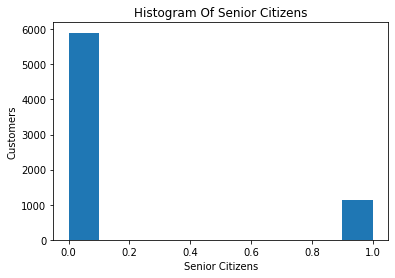

In [239]:
# Histogram of senior citizens

plt.hist(df['SeniorCitizen'])
plt.xlabel("Senior Citizens")
plt.ylabel("Customers")
plt.title("Histogram Of Senior Citizens")

The histogram shows that approximately 15% of the customers are senior citizens while approximately 85% of the customers are 
younger adults.

Text(0.5, 1.0, 'Histogram Of Partners')

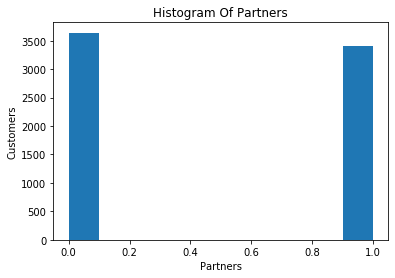

In [240]:
# Histogram of partners

plt.hist(df['Partner'])
plt.xlabel("Partners")
plt.ylabel("Customers")
plt.title("Histogram Of Partners")

Approximately 51% of the customers are not partners while approximately 49% of the customers are partners. 

Text(0.5, 1.0, 'Histogram Of Dependents')

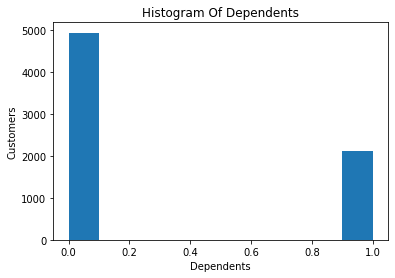

In [241]:
# Histogram of Dependents

plt.hist(df['Dependents'])
plt.xlabel("Dependents")
plt.ylabel("Customers")
plt.title("Histogram Of Dependents")

About 70% of the customers are not dependents while about 30% of the customers are dependents.

Text(0, 0.5, 'Customers')

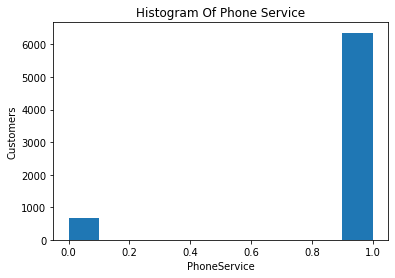

In [242]:
# Histogram for phone service

plt.hist(df["PhoneService"])
plt.title("Histogram Of Phone Service")
plt.xlabel("PhoneService")
plt.ylabel("Customers")

Approximately 10% of the customers do not have phone service while approximately 90% of the customers do have phone service.

Text(0, 0.5, 'Customers')

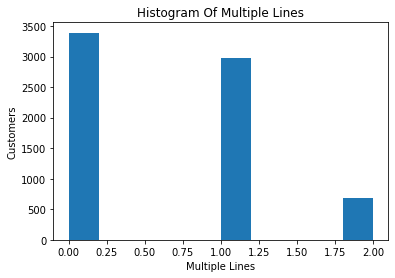

In [243]:
# Histogram for multiple lines

plt.hist(df['MultipleLines'])
plt.title("Histogram Of Multiple Lines")
plt.xlabel("Multiple Lines")
plt.ylabel("Customers")

Approximately 48% of the customers only have a single line, approximately 42% of the customers have multiple lines, and 10% of 
the customers do not have phone service.

Text(0, 0.5, 'Customers')

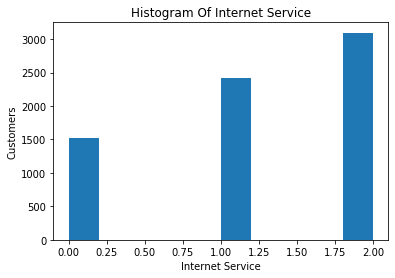

In [244]:
# Histogram for internet service

plt.hist(df['InternetService'])
plt.title("Histogram Of Internet Service")
plt.xlabel("Internet Service")
plt.ylabel("Customers")

About 21% of the customers have no internet service, about 35% of the customers have DSL connections, and about 44% of the 
customers have fiber optic connections. 

Text(0, 0.5, 'Customers')

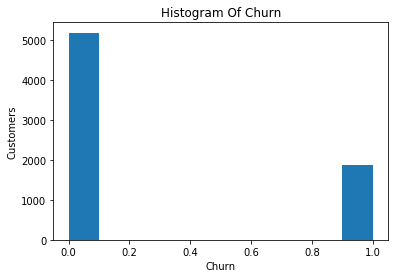

In [245]:
# Histogram of churn

plt.hist(df['Churn'])
plt.title("Histogram Of Churn")
plt.xlabel("Churn")
plt.ylabel("Customers")

Approximately 73% of the customers are still with their services while approximately 27% of the customers are no longer with 
their services.

Text(0, 0.5, 'Customers')

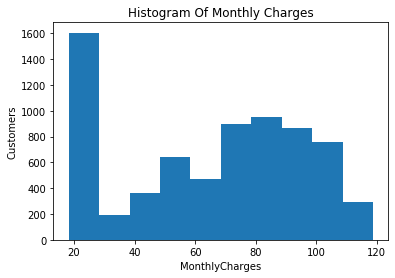

In [246]:
# Histogram of monthly charges

plt.hist(df['MonthlyCharges'])
plt.title("Histogram Of Monthly Charges")
plt.xlabel("MonthlyCharges")
plt.ylabel("Customers")

About 31% of the customers have low monthly charges of about 20 to 50 dollars, about 41% of the customers have medium monthly 
charges of about 50 dollars to 90 dollars, and about 28% of the customers have high monthly charges of about 90 to 120 dollars.

Text(0, 0.5, 'Monthly Charges')

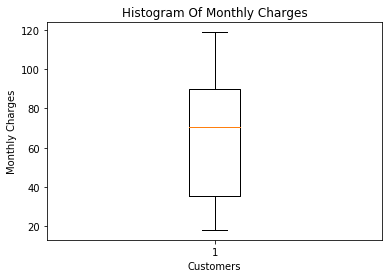

In [247]:
# Box plot of monthly charges

plt.boxplot(df['MonthlyCharges'])
plt.title("Histogram Of Monthly Charges")
plt.xlabel("Customers")
plt.ylabel("Monthly Charges")

In [248]:
df['MonthlyCharges'].describe()

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: MonthlyCharges, dtype: float64

The maximum of the box plot is 118.75 dollars, the minimum is 18.25 dollars, the median is 70.35 dollars, the 25th percentile 
is 35.50 dollars, and the 75th percentile is 89.85 dollars.

Text(0, 0.5, 'Customers')

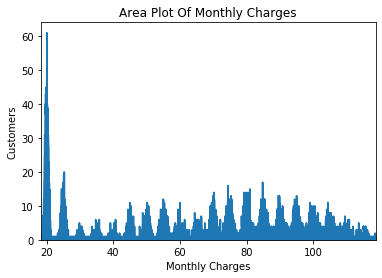

In [249]:
# Area plot of monthly charges

df['MonthlyCharges'].value_counts().sort_index().plot.area()
plt.title("Area Plot Of Monthly Charges")
plt.xlabel("Monthly Charges")
plt.ylabel("Customers")

Approximately 31% of the customers have low monthly charges of about 20 to 50 dollars, approximately 41% of the customers have 
medium monthly charges of about 50 to 90 dollars, and approximately 28% of the customers have high monthly charges of about 90 
to 120 dollars.

# Bivariate Analyses

Text(0, 0.5, 'Churn')

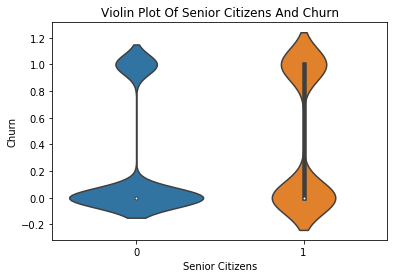

In [250]:
# Violin plot of senior citizens and churn

sns.violinplot(x=df['SeniorCitizen'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Senior Citizens And Churn")
plt.xlabel("Senior Citizens")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of customers who are no longer with their services. In the collective minority, the customers who are younger adults and are no longer with their services compose the minority while the customers who are senior citizens and are no longer with their services compose the majority.

Text(0, 0.5, 'Monthly Charges')

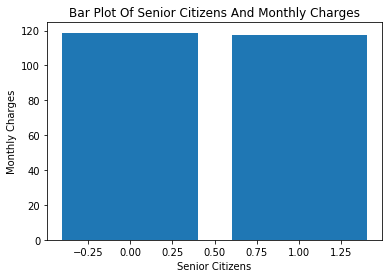

In [251]:
# Bar plot of senior citizens and monthly charges

plt.bar(df['SeniorCitizen'], df['MonthlyCharges'])
plt.title("Bar Plot Of Senior Citizens And Monthly Charges")
plt.xlabel("Senior Citizens")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 119 dollars are younger adults and customers who have monthly charges of about 118 dollars are senior citizens.

Text(0, 0.5, 'Churn')

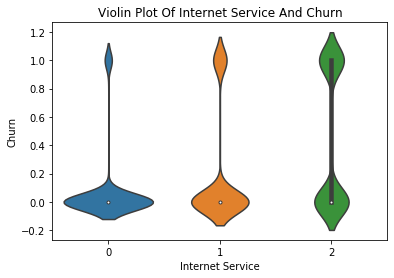

In [252]:
# Violin plot of internet service and churn

sns.violinplot(x=df['InternetService'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Internet Service And Churn")
plt.xlabel("Internet Service")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of customers who are no longer with their services. In the collective minority, the customers who have fiber optic connections and are no longer with their services compose the majority, the customers who have DSL connections and are no longer with their services compose the bigger minority, and the customers who do not have internet service and are no longer with their services compose the smaller minority.

Text(0, 0.5, 'Monthly Charges')

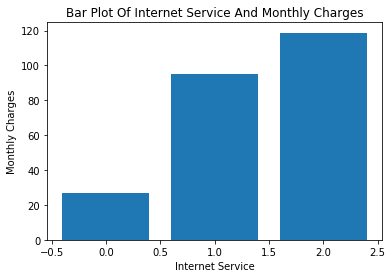

In [253]:
# Bar plot of internet service and monthly charges

plt.bar(df['InternetService'], df['MonthlyCharges'])
plt.title("Bar Plot Of Internet Service And Monthly Charges")
plt.xlabel("Internet Service")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 28 dollars do not have internet service, customers who have monthly charges of about 95 dollars have DSL connections, and customers who have monthly charges of about 119 dollars have fiber optic connections.

Text(0, 0.5, 'Churn')

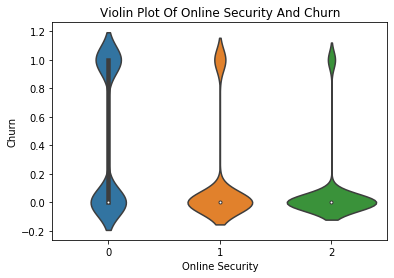

In [254]:
# Violin plot of online security and churn

sns.violinplot(x=df['OnlineSecurity'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Online Security And Churn")
plt.xlabel("Online Security")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who have no online security and are 
no longer with their services compose the majority, the customers who do have online security and are no longer with their 
services compose the bigger minority, and the customers who do not have internet service and are no longer with their services 
compose the smaller minority.

Text(0, 0.5, 'Monthly Charges')

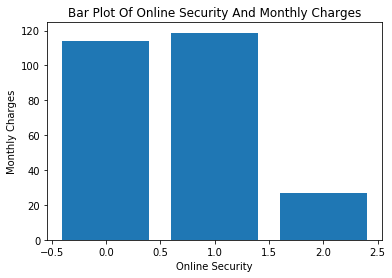

In [255]:
# Bar plot of online security and monthly charges

plt.bar(df['OnlineSecurity'], df['MonthlyCharges'])
plt.title("Bar Plot Of Online Security And Monthly Charges")
plt.xlabel("Online Security")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 116 dollars do not have online security, customers who have monthly charges of about 119 dollars do have online security, and customers who have monthly charges of about 28 dollars have no internet services.

Text(0, 0.5, 'Churn')

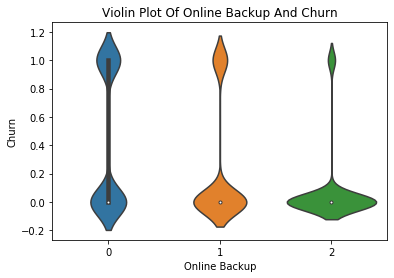

In [256]:
# Violin plot of online backup and churn

sns.violinplot(x=df['OnlineBackup'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Online Backup And Churn")
plt.xlabel("Online Backup")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who have no online backup and are 
no longer with their services compose the majority, the customers who do have online backup and are no longer with their 
services compose the bigger minority, and the customers who do not have internet service and are no longer with their services 
compose the smaller minority.

Text(0, 0.5, 'Churn')

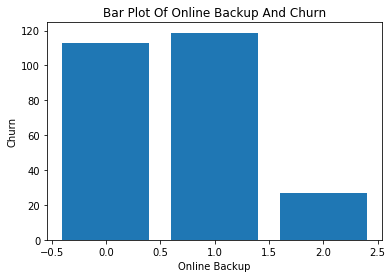

In [257]:
# Bar plot of online backup and monthly charges

plt.bar(df['OnlineBackup'], df['MonthlyCharges'])
plt.title("Bar Plot Of Online Backup And Churn")
plt.xlabel("Online Backup")
plt.ylabel("Churn")

Customers who have monthly charges of about 116 dollars do not have online backup, customers who have monthly charges of about 
119 dollars do have online backup, and customers who have monthly charges of about 28 dollars have no internet services.

Text(0, 0.5, 'Churn')

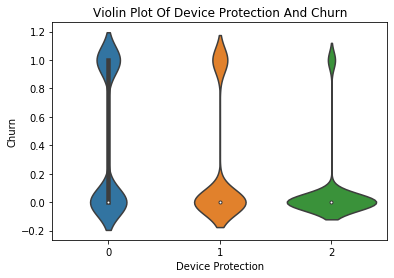

In [258]:
# Violin plot of device protection and churn

sns.violinplot(x=df['DeviceProtection'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Device Protection And Churn")
plt.xlabel("Device Protection")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who have no device protection and are no longer with their services compose the majority, the customers who do have device protection and are no longer with their services compose the bigger minority, and the customers who do not have internet service and are no longer with their services compose the smaller minority.

Text(0, 0.5, 'Monthly Charges')

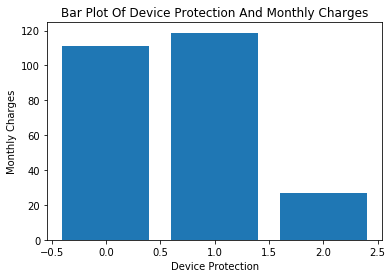

In [259]:
# Bar plot of device protection and monthly charges

plt.bar(df['DeviceProtection'], df['MonthlyCharges'])
plt.title("Bar Plot Of Device Protection And Monthly Charges")
plt.xlabel("Device Protection")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 116 dollars do not have device protection, customers who have monthly charges of 
about 119 dollars do have online backup, and customers who have monthly charges of about 28 dollars have no device protection.

Text(0, 0.5, 'Churn')

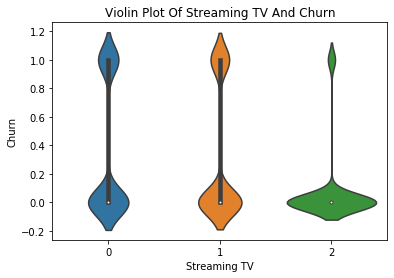

In [260]:
# Violin plot of streaming TV and churn

sns.violinplot(x=df['StreamingTV'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Streaming TV And Churn")
plt.xlabel("Streaming TV")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who do not stream TV and are no 
longer with their services compose the majority, the customers who do stream TV and are no longer with their services compose 
the bigger minority, and the customers who do not have internet service and are no longer with their services compose the 
smaller minority.

Text(0, 0.5, 'Monthly Charges')

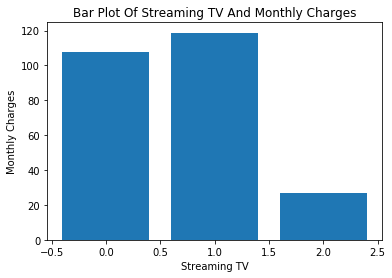

In [261]:
# Bar plot of streaming TV and monthly charges

plt.bar(df['StreamingTV'], df['MonthlyCharges'])
plt.title("Bar Plot Of Streaming TV And Monthly Charges")
plt.xlabel("Streaming TV")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 114 dollars do not stream TV, customers who have monthly charges of about 119 
dollars do stream TV, and customers who have monthly charges of about 28 dollars have no internet service.

Text(0, 0.5, 'Churn')

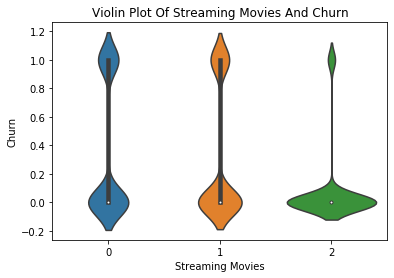

In [262]:
# Violin plot of streaming movies and churn

sns.violinplot(x=df['StreamingMovies'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Streaming Movies And Churn")
plt.xlabel("Streaming Movies")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of 
customers who are no longer with their services. In the collective minority, the customers who do not stream movies and are no 
longer with their services compose the majority, the customers who do stream movies and are no longer with their services 
compose the bigger minority, and the customers who do not have internet service and are no longer with their services compose 
the smaller minority.

Text(0, 0.5, 'Monthly Charges')

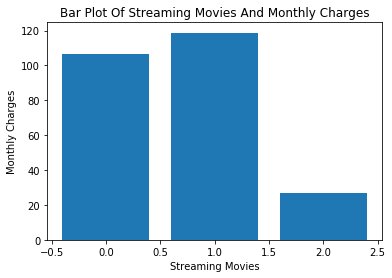

In [263]:
# Bar plot of streaming movies and monthly charges

plt.bar(df['StreamingMovies'], df['MonthlyCharges'])
plt.title("Bar Plot Of Streaming Movies And Monthly Charges")
plt.xlabel("Streaming Movies")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 114 dollars do not stream movies, customers who have monthly charges of about 119 
dollars do stream movies, and customers who have monthly charges of about 28 dollars have no internet service.

Text(0, 0.5, 'Churn')

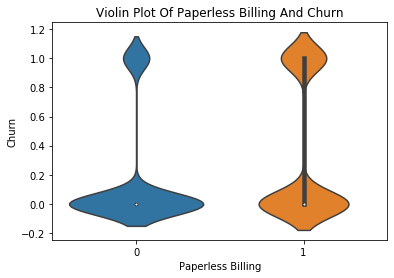

In [264]:
# Violin plot of paperless billing and churn

sns.violinplot(x=df['PaperlessBilling'], y=df['Churn'], df = pd.read_excel (r'D:\WA_Fn-UseC_-Telco-Customer-Churn.xlsx'), size=8)
plt.title("Violin Plot Of Paperless Billing And Churn")
plt.xlabel("Paperless Billing")
plt.ylabel("Churn")

The violin plot has a collective majority of customers who are still with their services while it has a collective minority of customers who are no longer with their services. In the collective minority, the customers who do not have paperless billing and are no longer with their services compose the minority while the customers who do have paperless billing and are no longer with their services compose the majority.

Text(0, 0.5, 'Monthly Charges')

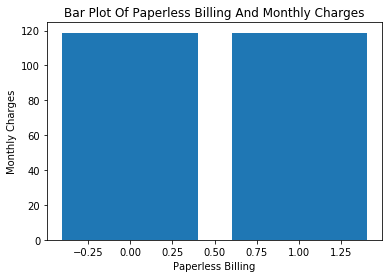

In [265]:
# Bar plot of paperless billing and monthly charges

plt.bar(df['PaperlessBilling'], df['MonthlyCharges'])
plt.title("Bar Plot Of Paperless Billing And Monthly Charges")
plt.xlabel("Paperless Billing")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 119 dollars do not have paperless billing while customers who have monthly charges of about 118 dollars do have paperless billing.

Text(0, 0.5, 'Monthly Charges')

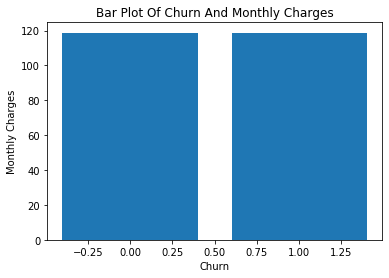

In [266]:
# Bar plot of churn and monthly charges

plt.bar(df['Churn'], df['MonthlyCharges'])
plt.title("Bar Plot Of Churn And Monthly Charges")
plt.xlabel("Churn")
plt.ylabel("Monthly Charges")

Customers who have monthly charges of about 119 dollars are still with their services and customers who have monthly charges of about 118 dollars are no longer with their services.

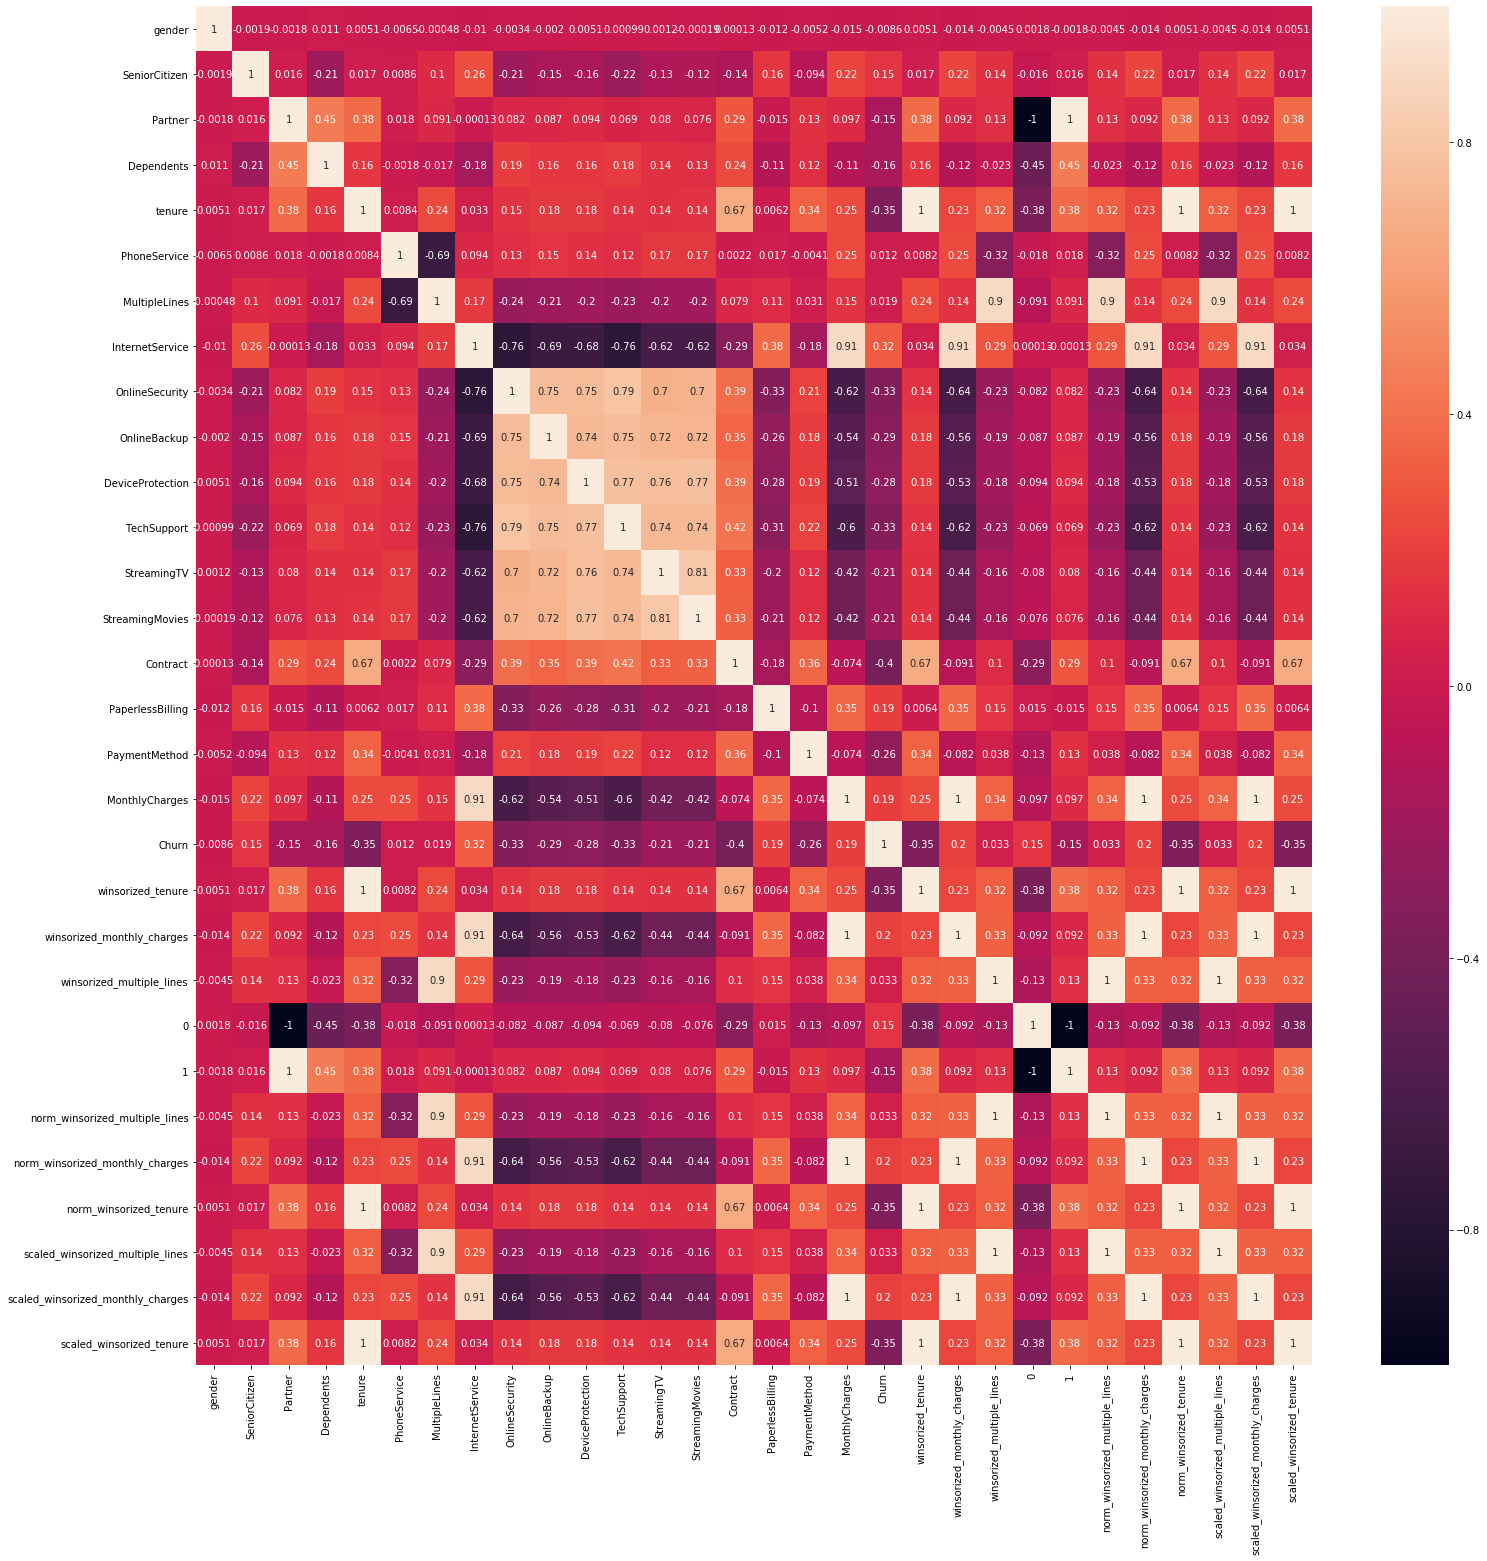

In [269]:
# Heatmap
# 15, 15
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), vmin=-1, annot=True);

In the heatmap, the only categories of the original dataset that have strong positive values regarding churn are senior citizens, Internet service, paperless billing, monthly charges, and churn (churn cannot really be counted because it is its own category). The categories that have weak positive values regarding churn are phone service and multiple lines. The strong negative values for churn are partner, dependents, tenure, online security, online backup, device protection, tech support, streaming TV, streaming movies, contract, and payment method. The category that has the only weak negative value is gender. Therefore, numerous categories go against churn and aid churn only a little bit except for senior citizens, Internet service, and paperless billing (the only categories that have strong positive values). 

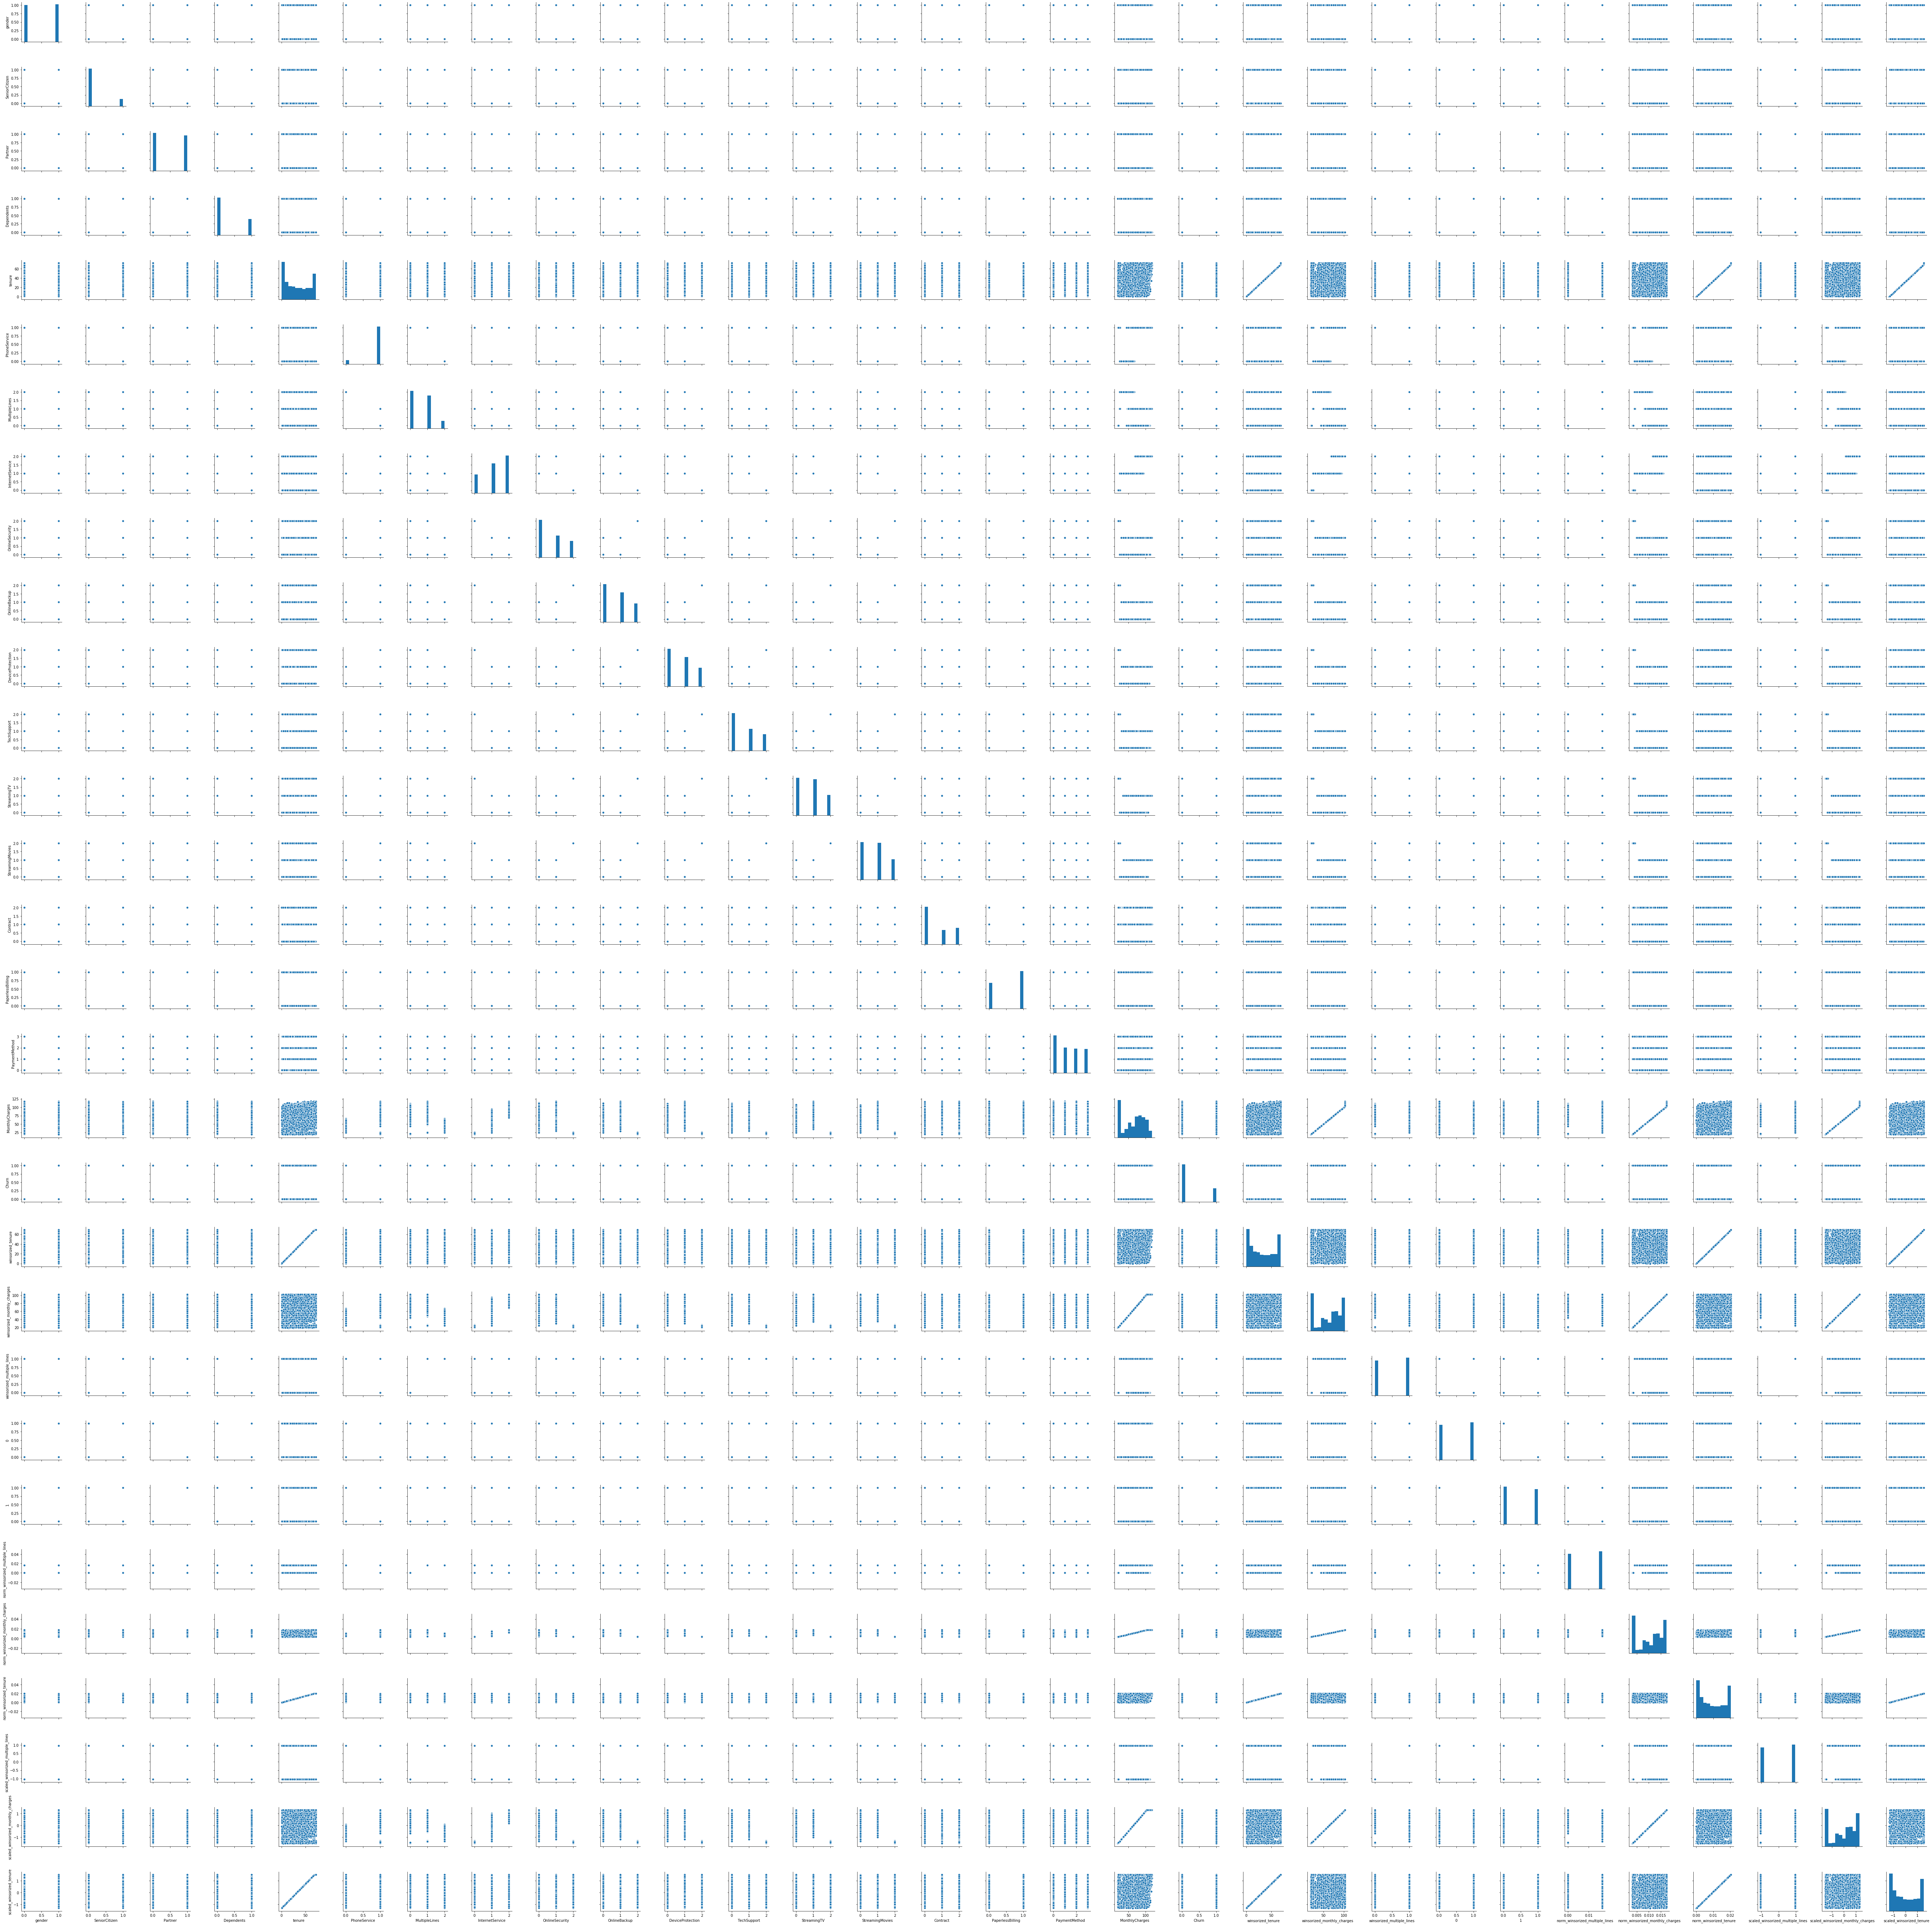

In [270]:
# Pair Plot

sns.pairplot(df)

The heatmap here has a big majority of scatter plots and a minority of histograms (for the original data). The scatter plots reveal very little about the data because of the ways in whcih they are formed. A few of the scatter plots are coherent with two of them being the most coherent. The histograms pretty much depict what has been depicted before in the histograms placed above the pair plot.

# Gradient Boosting

In [271]:
# Dropping the category of churn for X

Y = df['Churn']
X = df.drop(columns=['Churn'])
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,...,winsorized_monthly_charges,winsorized_multiple_lines,0,1,norm_winsorized_multiple_lines,norm_winsorized_monthly_charges,norm_winsorized_tenure,scaled_winsorized_multiple_lines,scaled_winsorized_monthly_charges,scaled_winsorized_tenure
0,0,0,1,0,1,0,2,1,0,1,...,29.85,1,0,1,0.016545,0.005041,0.000296,0.963330,-1.173013,-1.286442
1,1,0,0,0,34,1,0,1,1,0,...,56.95,0,1,0,0.000000,0.009618,0.010065,-1.038066,-0.247446,0.076324
2,1,0,0,0,2,1,0,1,1,1,...,53.85,0,1,0,0.000000,0.009094,0.000592,-1.038066,-0.353322,-1.245146
3,1,0,0,0,45,0,2,1,1,0,...,42.30,1,1,0,0.016545,0.007144,0.013322,0.963330,-0.747799,0.530579
4,0,0,0,0,2,1,0,2,0,0,...,70.70,0,1,0,0.000000,0.011940,0.000592,-1.038066,0.222169,-1.245146


In [272]:
# Obtaining the cross_val_scores of Gradient Boosting

classifier = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0)
print(cross_val_score(classifier, X, Y, cv=5))

[0.79985806 0.78992193 0.76863023 0.78992193 0.79175551]


Gradient Boosting yields the second highest cross_val_scores for the Churn dataset.

In [273]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Gradient Boosting Classifier

classifier = GradientBoostingClassifier(max_depth=2, n_estimators=3, learning_rate=1.0).fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    1282
1     479
Name: Churn, dtype: int64
y predicted : 
0    1396
1     365
dtype: int64


In [274]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Gradient Boosting Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.7864849517319704
Precision Score : 0.6410958904109589
Recall Score : 0.48851774530271397
F1 Score : 0.5545023696682465
Confusion Matrix : 
[[1151  131]
 [ 245  234]]


Gradient Boosting yields the second highest accuracy score, the third highest precision score, the third highest recall score, and the second highest F1 score for the Churn dataset.

# Random Forest

In [275]:
# Obtaining the cross_val_scores of Random Forest

random_forest = RandomForestClassifier(max_depth=2, max_features=3)
print(cross_val_score(random_forest, X, Y, cv=5))

[0.7920511  0.78850248 0.73456352 0.77572747 0.77967306]


C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

Random Forest yields the fourth highest cross_val_scores for the Churn dataset.

In [276]:
# Tuning of hyperparameters

random_forest = RandomForestClassifier(max_depth=3, max_features=4)
print(cross_val_score(random_forest, X, Y, cv=5))

C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 

[0.79843861 0.79701916 0.78069553 0.79063165 0.79886283]


I used a max_depth of 2 and 3 max_features for the Random Forest method and I obtained cross_val_scores of 0.792, 0.789, 0.735, 0.776, and 0.780. I then tuned the hyperparameters by changing the max_depth of 3 and 4 max_features for the Random Forest method and I obtained cross_val_scores of 0.798, 0.797, 0.781, 0.791, and 0.799. Therefore, the Random Forest method works better with a max_depth of 3 and 4 max_features than it does with a max_depth of 2 and 3 max_features.

In [277]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Random Forest Classifier

random_forest = RandomForestClassifier(max_depth=2, max_features=3).fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    1282
1     479
Name: Churn, dtype: int64
y predicted : 
0    1552
1     209
dtype: int64


C:\ANACONDA\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [278]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Random Forest Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.7773992049971608
Precision Score : 0.7081339712918661
Recall Score : 0.3089770354906054
F1 Score : 0.4302325581395349
Confusion Matrix : 
[[1221   61]
 [ 331  148]]


Random Forest yields the third highest highest accuracy score, the first highest precision score, the fifth highest recall score, and the fourth highest F1 score for the Churn dataset.

# Logistic Regression

In [279]:
# Obtaining the cross_val_scores of Logistic Regression

clf = LogisticRegression(random_state=0).fit(X, Y)
print(cross_val_score(clf, X, Y, cv=5))

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ANACONDA\lib\site-packages\sklea

[0.80269695 0.81547197 0.78353442 0.80198722 0.80525942]


Logistic Regression yields the highest cross_val_scores for the Churn dataset.

In [280]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Logistic Regression Classifier

clf = LogisticRegression(random_state=0).fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

C:\ANACONDA\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


y actual : 
0    1282
1     479
Name: Churn, dtype: int64
y predicted : 
0    1357
1     404
dtype: int64


In [281]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Logistic Regression Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.8131743327654741
Precision Score : 0.6856435643564357
Recall Score : 0.5782881002087683
F1 Score : 0.6274065685164213
Confusion Matrix : 
[[1155  127]
 [ 202  277]]


Logistic Regression yields the highest accuracy score, the highest precision score, the highest recall score, and the highest 
F1 score for the Churn dataset.

# Decision Tree

In [282]:
# Obtaining the cross_val_scores of Decision Tree

clf = tree.DecisionTreeClassifier()
print(cross_val_score(clf, X, Y, cv=5))

[0.73598297 0.71398155 0.71398155 0.71185238 0.72921109]


Decision Tree yields the fifth highest cross_val_scores for the Churn dataset.

In [283]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# Decision Tree Classifier

clf = tree.DecisionTreeClassifier().fit(X_train, y_train)

y_pred = clf.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    1282
1     479
Name: Churn, dtype: int64
y predicted : 
0    1294
1     467
dtype: int64


In [284]:
# Model Evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# Decision Tree Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.7240204429301533
Precision Score : 0.4925053533190578
Recall Score : 0.4801670146137787
F1 Score : 0.48625792811839325
Confusion Matrix : 
[[1045  237]
 [ 249  230]]


Decision Tree yields the fifth highest accuracy score, the fifth highest precision score, the fourth highest recall score, and the third highest F1 score for the Churn dataset.

# KNN Classifier

In [285]:
# StandardScaler

scaler = StandardScaler()
print(scaler.fit(X, Y))
StandardScaler()
print(scaler.transform(X))

StandardScaler(copy=True, with_mean=True, with_std=True)
[[-1.00955867 -0.43991649  1.03453023 ...  0.96332984 -1.17301338
  -1.28644242]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.03806605 -0.24744553
   0.07632392]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.03806605 -0.3533223
  -1.24514647]
 ...
 [-1.00955867 -0.43991649  1.03453023 ...  0.96332984 -1.18155183
  -0.87348292]
 [ 0.99053183  2.27315869  1.03453023 ...  0.96332984  0.34853819
  -1.16255457]
 [ 0.99053183 -0.43991649 -0.96662231 ... -1.03806605  1.31167522
   1.39779432]]


In [286]:
X = scaler.transform(X)

In [287]:
# Obtaining the cross_val_scores of KNN Classifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
print(cross_val_score(knn, X, Y, cv=5))

[0.77927608 0.75585522 0.75443577 0.76437189 0.76545842]


KNN Classifier yields the third highest cross_val_scores for the Churn dataset.

In [288]:
# Perform training and test split

X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

# KNeighbors Classifier

knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean').fit(X_train, y_train)

y_pred = knn.predict(X_test)

# Distribution of y test

print('y actual : \n' +  str(y_test.value_counts()))

# Distribution of y predicted

print('y predicted : \n' + str(pd.Series(y_pred).value_counts()))

y actual : 
0    1282
1     479
Name: Churn, dtype: int64
y predicted : 
0    1331
1     430
dtype: int64


In [289]:
# Model evaluation metrics 

print('Accuracy Score : ' + str(accuracy_score(y_test,y_pred)))
print('Precision Score : ' + str(precision_score(y_test,y_pred)))
print('Recall Score : ' + str(recall_score(y_test,y_pred)))
print('F1 Score : ' + str(f1_score(y_test,y_pred)))

# KNeighbors Classifier Confusion matrix

print('Confusion Matrix : \n' + str(confusion_matrix(y_test,y_pred)))

Accuracy Score : 0.7677455990914254
Precision Score : 0.5813953488372093
Recall Score : 0.5219206680584552
F1 Score : 0.5500550055005501
Confusion Matrix : 
[[1102  180]
 [ 229  250]]


KNN Classifier yields the fourth highest accuracy score, the fourth highest precision score, the second highest recall score, and the second highest F1 score for the Churn dataset.

# Summary

   I started this project with the intention of determining the causes of customer churn and determining the best method to use with the Churn dataset. The first step of my project was to use Exploratory Data Analysis and the second step was to do feature engineering regarding variables, features, dimensionality, and PCA. The third step was to do univariate analyses and the fourth step was to do bivariate analyses. The fifth step was to use the methods of KNN Classifier, Gradient Boosting, Random Forest, Decision Tree, and Logistic Regression to obtain cross_val_scores, accuracy scores, precision scores, recall scores, and F1 scores. I used Exploratory Data Analysis by plotting a few box plots and histograms of tenure and senior citizens as well as by obtaining the threshold numbers and numbers of outliers of tenure and log transformed tenure. I then plotted multiple histograms for univariate analysis and I plotted multiple violin plots, bar plots, a heatmap, and a pair plot for bivariate analysis. With all these graphs, I came to the conclusion that most of the customers for customer churn were senior citizens, people with fiber optic connections for Internet service, people with paperless billing, and people with high monthly charges; therefore, I propose that the monthly charges be somewhat decreased to greatly reduce customer churn.
   After I came to my conclusion regarding customer churn, I used the methods of KNN Classifier, Gradient Boosting, Random Forest, Decision Tree, and Logistic Regression to obtain cross_val_scores. The cross_val_scores of KNN Classifier were about 0.779, 0.756, 0.754, 0.764, and 0.765; and the cross_val_scores of Gradient Boosting were about 0.800, 0.790, 0.769, 0.790, and 0.792. The cross_val_scores of Random Forest were about 0.792, 0.789, 0.735, 0.776, and 0.780 for a max_depth of 2 and 3 max_features; and the cross_val_scores of Random Forest were about 0.798, 0.797, 0.781, 0.791, and 0.799 for a max_depth of 3 and 4 max_features. Thus, the max_depth of 3 and the 4 max_features are better for the Random Forest method for the Churn dataset than the max_depth of 2 and 3 max_features are. Also, the cross_val_scores of Decision Tree are 0.736, 0.714, 0.714, 0.712, and 0.729; and the cross_val_scores of Logistic Regression are 0.803, 0.815, 0.784, 0.802, and 0.805. Therefore, Logistic Regression has the highest cross_val_scores.
   Once the cross_val_scores for the five methods were found, I then determined what the accuracy, precision, recall, and F1 scores for the five methods were. The accuracy scores were about 0.81 for Logistic Regression, about 0.79 for Gradient Boosting, about 0.78 for Random Forest, about 0.77 for KNN Classifier, and about 0.72 for Decision Tree. The precision scores were about 0.71 for Random Forest, about 0.69 for Logistic Regression, about 0.64 for Gradient Boosting, about 0.58 for KNN Classifier, and 0.49 for Decision Tree. The recall scores were about 0.58 for Logistic Regression, about 0.52 for KNN Classifier, about 0.49 for Gradient Boosting, about 0.48 for Decision Tree, and about 0.31 for Random Forest. The F1 scores were about 0.63 for Logistic Regression, about 0.55 for Gradient Boosting and KNN Classifier, about 0.49 for Decision Tree, and about 0.43 for Random Forest. 
   Logistic Regression had the highest cross_val_scores, the highest accuracy score, the second highest precision score, the highest recall score, and the highest F1 score; Gradient Boosting had the second cross_val_scores, the second highest accuracy score, the third highest precision score, the third highest recall score, and the second highest F1 score. Random Forest had the third highest cross_val_scores, the third highest accuracy score, the highest precision score, the fifth highest recall score, and the fourth highest F1 score. KNN Classifier had the fourth highest cross_val_scores, the fourth highest accuracy scores, the fourth highest precision scores, the second highest recall score, and the second highest F1 score. Decision Tree had the fifth highest cross_val_scores, the fifth highest accuracy score, the fifth highest precision score, the fourth highest recall score, and the third highest F1 score. Therefore, Logistic Regression was the best method to use with the Churn dataset. These were the answers that I came to for my two questions regarding customer churn and best method.   